In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb

import os
plt.style.use('seaborn')

import warnings
warnings.filterwarnings('ignore')

from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

import pickle


/tmp/ipykernel_10595/3967713485.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [2]:
if not os.path.exists('Results'):
    os.makedirs('Results')

In [3]:
!ls


catboost_info
lightgbm-explanation-practice-with-dataset.ipynb
Results
spaceship-titanic
spaceship-titanic.zip
Space_Titanic_encoding_n_2.ipynb
Space_Titanic_Project.ipynb
Untitled1.ipynb
Untitled.ipynb


In [4]:
data = pd.read_csv('spaceship-titanic/train.csv')
y = data.Transported

In [5]:
data.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,8514.0,28.827930,14.489021,0.0,19.0,27.0,38.0,79.0
RoomService,8512.0,224.687617,666.717663,0.0,0.0,0.0,47.0,14327.0
FoodCourt,8510.0,458.077203,1611.489240,0.0,0.0,0.0,76.0,29813.0
ShoppingMall,8485.0,173.729169,604.696458,0.0,0.0,0.0,27.0,23492.0
Spa,8510.0,311.138778,1136.705535,0.0,0.0,0.0,59.0,22408.0
VRDeck,8505.0,304.854791,1145.717189,0.0,0.0,0.0,46.0,24133.0


In [8]:
#fing the missing values

In [9]:
data.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [10]:
# PassengerId is unique for every passenger so we are going to remove it

In [11]:
data['PassengerId'].value_counts()

0001_01    1
6136_01    1
6141_01    1
6139_06    1
6139_05    1
          ..
3126_01    1
3124_03    1
3124_02    1
3124_01    1
9280_02    1
Name: PassengerId, Length: 8693, dtype: int64

In [12]:
 unique_id = data.PassengerId.unique() #another way

In [13]:
unique_id.size

8693

In [14]:
#========================================================================================

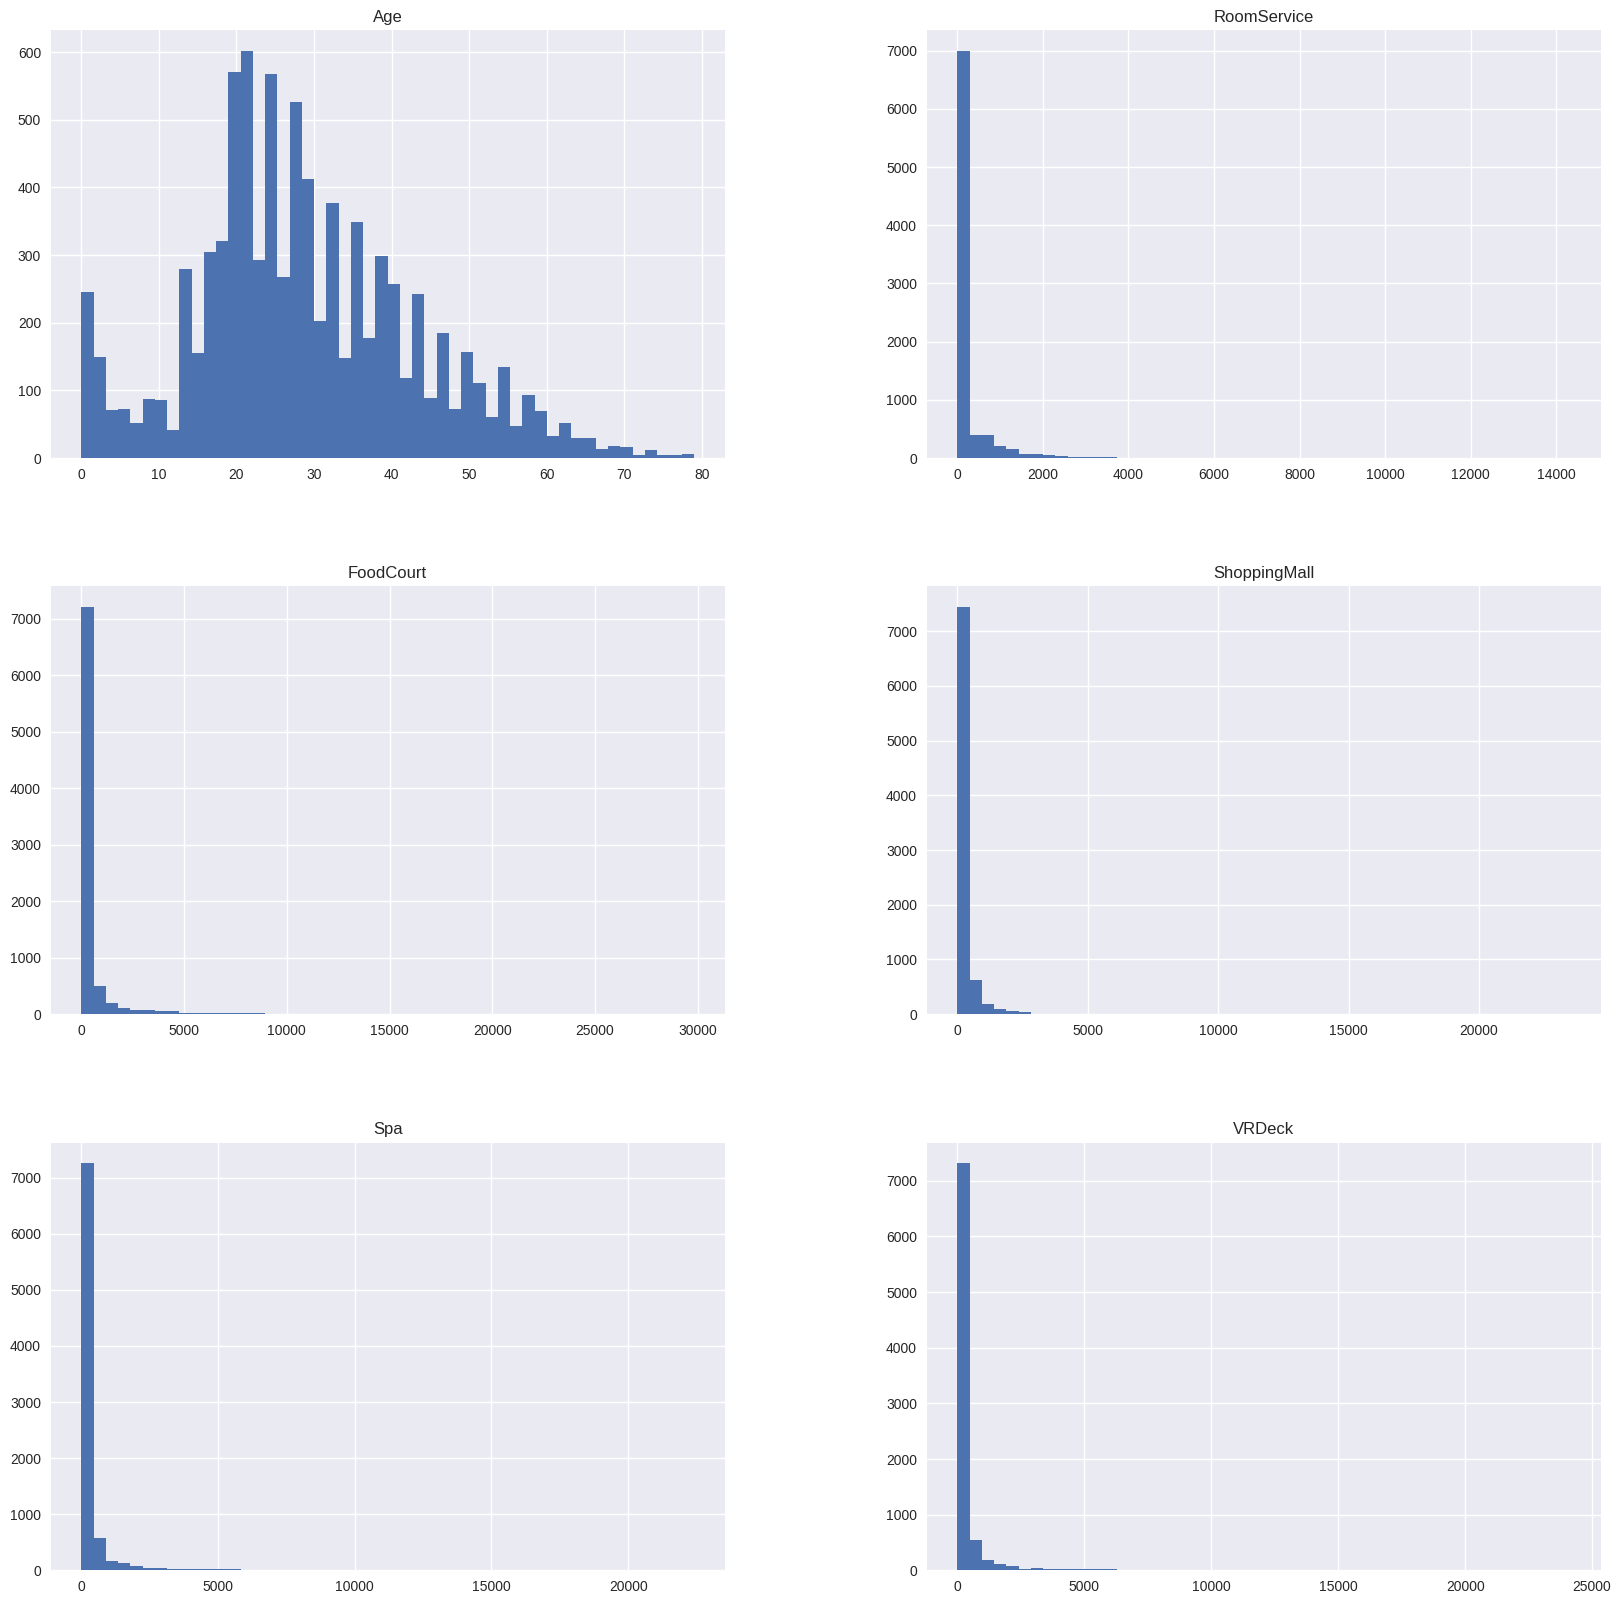

In [15]:
data.hist(bins = 50, figsize = (20, 20));

<AxesSubplot: xlabel='Transported', ylabel='count'>

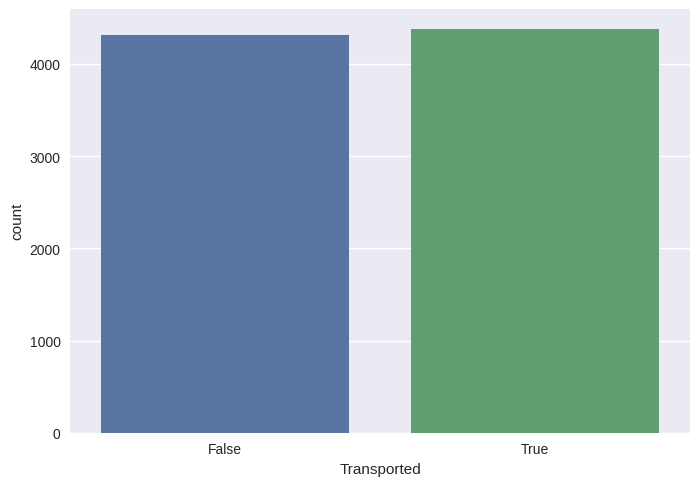

In [16]:
sb.countplot(x = 'Transported', data = data)

In [17]:
data['Transported'].value_counts()

True     4378
False    4315
Name: Transported, dtype: int64

<AxesSubplot: xlabel='Transported', ylabel='count'>

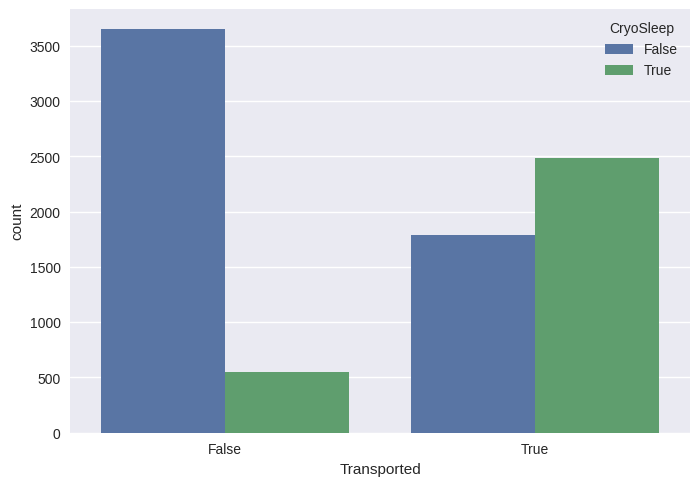

In [18]:
sb.countplot(x = 'Transported', hue = 'CryoSleep', data = data)

<AxesSubplot: ylabel='Frequency'>

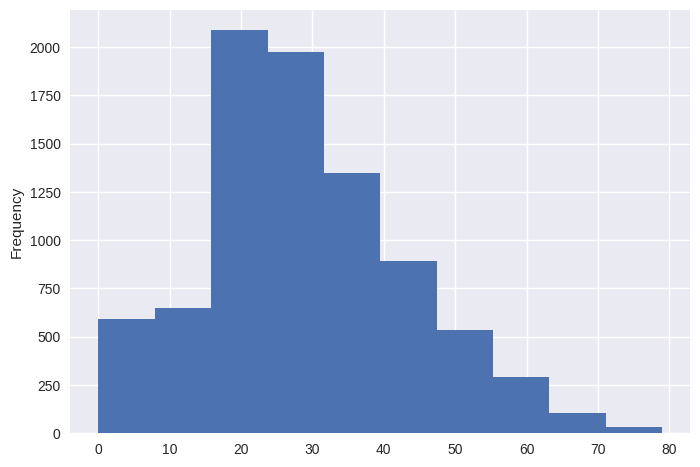

In [19]:
data.Age.plot.hist()

In [20]:
#===============================================================================


In [21]:
data.corr()['Transported'].sort_values(ascending = False)

Transported     1.000000
FoodCourt       0.046566
ShoppingMall    0.010141
Age            -0.075026
VRDeck         -0.207075
Spa            -0.221131
RoomService    -0.244611
Name: Transported, dtype: float64

In [22]:
#correlation matrix

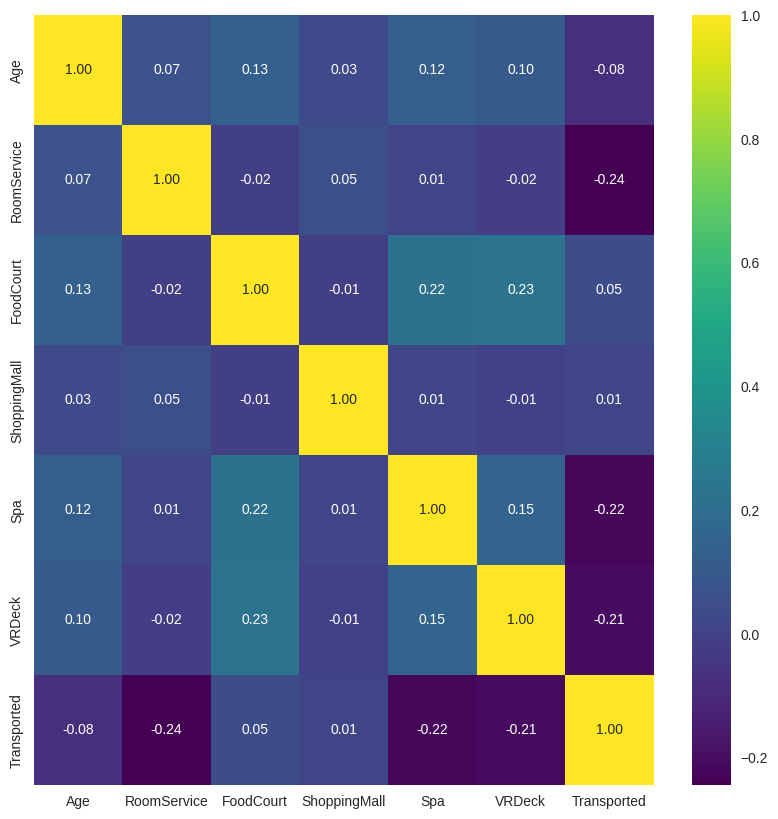

In [23]:
def correlation_matrix(data):
    corr = data.corr()
    fig, ax = plt.subplots(figsize = (10, 10))
    ax = sb.heatmap(corr, annot=True, fmt = '.2f', cmap = 'viridis')
correlation_matrix(data)

In [24]:
#Find num and categorical 


In [25]:
num = list(data.select_dtypes(include='number'))
cat = list(data.select_dtypes(exclude = 'number'))

In [26]:
#find the null percentange 

In [27]:
def null_percentage(data):
    na_count = data.isna().sum().sort_values(ascending = False)
    na_percentage = (na_count/len(data))*100
    d_types = data.dtypes
    data_info = pd.concat([na_count, na_percentage, d_types], axis =1, keys = ['Null', 'Percentage of Null(%)', 'Types'])
    return data_info

In [28]:
null_percentage(data)

,Null,Percentage of Null(%),Types
CryoSleep,217,2.496261,object
ShoppingMall,208,2.392730,float64
VIP,203,2.335212,object
HomePlanet,201,2.312205,object
Name,200,2.300702,object
Cabin,199,2.289198,object
VRDeck,188,2.162660,float64
FoodCourt,183,2.105142,float64
Spa,183,2.105142,float64
Destination,182,2.093639,object


In [29]:
data.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

In [30]:
data[num].columns

Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], dtype='object')

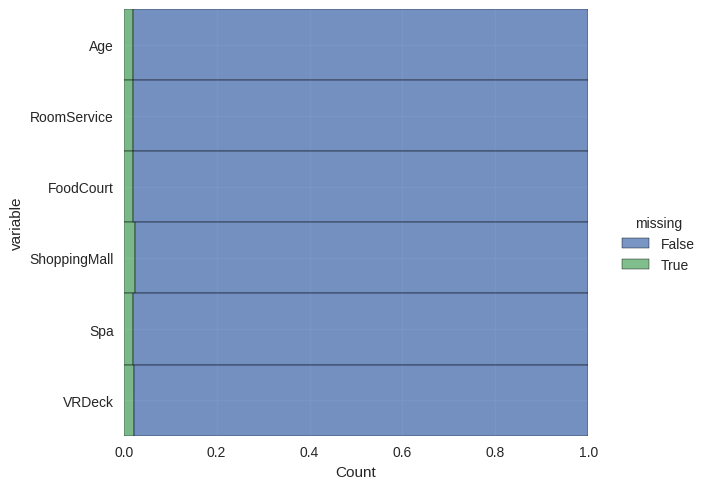

In [31]:
names_num = data[num].columns
sb.displot(data = data[names_num].isna().melt(value_name = 'missing'),
          y = 'variable',
          hue = 'missing',
          multiple = 'fill',
          aspect = 1.25);

In [32]:
# check for the behavior of the missing values 

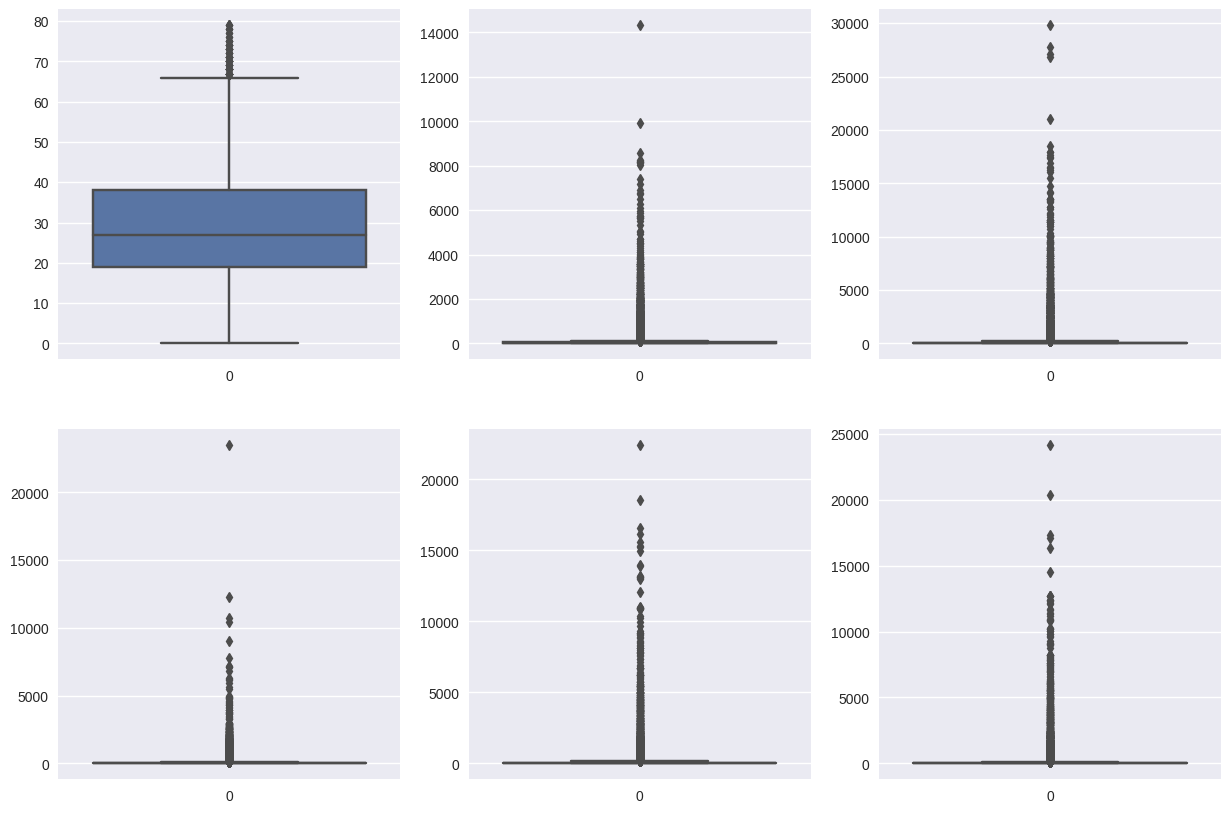

In [33]:
rows = 2
cols = math.ceil(len(names_num)/2)
fig = plt.figure(figsize = (15, 10))
for i, col in enumerate (names_num):
    ax = fig.add_subplot(rows, cols, i+1)
    sb.boxplot(data[col], ax = ax)

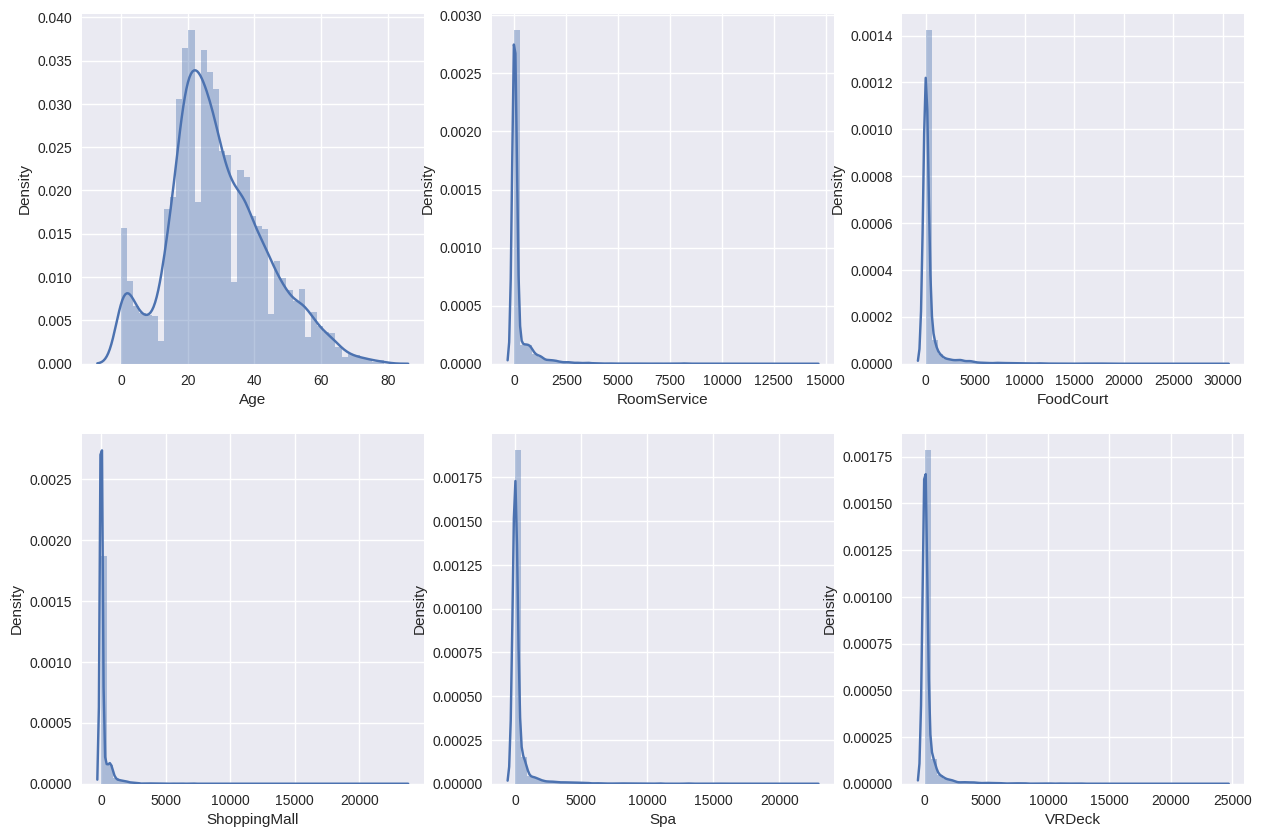

In [34]:
rows = 2
cols = math.ceil(len(names_num)/2)
fig = plt.figure(figsize = (15,10))
for i, col in enumerate (names_num):
    ax = fig.add_subplot(rows, cols, i+1)
    sb.distplot(data[col], ax = ax)

In [35]:
skew = data.skew(skipna = True, numeric_only = True).sort_values(ascending = True)
skew

Transported     -0.014497
Age              0.419097
RoomService      6.333014
FoodCourt        7.102228
Spa              7.636020
VRDeck           7.819732
ShoppingMall    12.627562
dtype: float64

In [36]:
kurtosis = data.kurtosis(skipna = True, numeric_only = True).sort_values(ascending = True)
kurtosis

Transported      -2.000250
Age               0.101933
RoomService      65.273802
FoodCourt        73.307230
Spa              81.202110
VRDeck           86.011186
ShoppingMall    328.870913
dtype: float64

In [37]:
# we delete passengerid cabin and name from our dataset

In [38]:
data.drop(['PassengerId', 'Cabin', 'Name'], axis =1 , inplace = True)

In [39]:
data

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True
...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False
8689,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False
8690,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True
8691,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False


In [40]:
# we replace the missing numerical values 

In [41]:
num = list(data.select_dtypes(include = 'number'))
num

['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

In [42]:
#===================================================================================

In [43]:
# for i in num:
#     data.fillna(data[i].median(), inplace = True)

In [44]:
null_percentage(data[num])

,Null,Percentage of Null(%),Types
ShoppingMall,208,2.392730,float64
VRDeck,188,2.162660,float64
FoodCourt,183,2.105142,float64
Spa,183,2.105142,float64
RoomService,181,2.082135,float64
Age,179,2.059128,float64


In [45]:
#Fill the missing numerical values with median

In [46]:
data.drop('Transported',axis =1,  inplace = True)

In [47]:
data.head(10)

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0
5,Earth,False,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0
6,Earth,False,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0
7,Earth,True,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN
8,Earth,False,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0
9,Europa,True,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0


In [48]:
num = list(data.select_dtypes(include = 'number'))
cat = list(data.select_dtypes(exclude = 'number'))


In [49]:
#Fill the categorical

In [50]:
data[cat] = data[cat].fillna('missing')

In [51]:
null_percentage(data)

,Null,Percentage of Null(%),Types
ShoppingMall,208,2.392730,float64
VRDeck,188,2.162660,float64
FoodCourt,183,2.105142,float64
Spa,183,2.105142,float64
RoomService,181,2.082135,float64
Age,179,2.059128,float64
HomePlanet,0,0.000000,object
CryoSleep,0,0.000000,object
Destination,0,0.000000,object
VIP,0,0.000000,object


In [52]:
#fill the numerical 

In [53]:
for i in num:
    data.fillna(data[i].median(), inplace = True)

In [54]:
#check for missing values

In [55]:
null_percentage(data)

,Null,Percentage of Null(%),Types
HomePlanet,0,0.0,object
CryoSleep,0,0.0,object
Destination,0,0.0,object
Age,0,0.0,float64
VIP,0,0.0,object
RoomService,0,0.0,float64
FoodCourt,0,0.0,float64
ShoppingMall,0,0.0,float64
Spa,0,0.0,float64
VRDeck,0,0.0,float64


In [56]:
# encoding


In [57]:
data_encoding = pd.get_dummies(data)

In [58]:
data_encoding

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,HomePlanet_missing,CryoSleep_False,CryoSleep_True,CryoSleep_missing,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Destination_missing,VIP_False,VIP_True,VIP_missing
0,39.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,1,0,0,0,0,1,0,1,0,0
1,24.0,109.0,9.0,25.0,549.0,44.0,1,0,0,0,1,0,0,0,0,1,0,1,0,0
2,58.0,43.0,3576.0,0.0,6715.0,49.0,0,1,0,0,1,0,0,0,0,1,0,0,1,0
3,33.0,0.0,1283.0,371.0,3329.0,193.0,0,1,0,0,1,0,0,0,0,1,0,1,0,0
4,16.0,303.0,70.0,151.0,565.0,2.0,1,0,0,0,1,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,41.0,0.0,6819.0,0.0,1643.0,74.0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
8689,18.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,1,0,0,1,0,0,1,0,0
8690,26.0,0.0,0.0,1872.0,1.0,0.0,1,0,0,0,1,0,0,0,0,1,0,1,0,0
8691,32.0,0.0,1049.0,0.0,353.0,3235.0,0,1,0,0,1,0,0,1,0,0,0,1,0,0


In [59]:
# Normalize the data


In [60]:
data_encoding_norm = StandardScaler().fit(data_encoding).transform(data_encoding.astype(float))

In [61]:
y = y.replace({True:1, False:0})

In [62]:
# Train Test Split

In [63]:
X_train, X_test, y_train, y_test = train_test_split(data_encoding_norm, y, shuffle=True, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6519, 20), (2174, 20), (6519,), (2174,))

In [64]:
np.random.seed(42)
model = RandomForestClassifier(n_estimators=200)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.7713891444342227

In [65]:
# cross validation score


In [66]:
np.random.seed(42)
clf = cross_val_score(RandomForestClassifier(), 
                     data_encoding_norm,
                     y,
                     cv = 5)


In [67]:
np.mean(clf)


0.7824704488049493

In [68]:
# GridSearchCV 


In [69]:
# RandonForestClassifier

In [70]:
# np.random.seed(42)
# grid = {'n_estimators':np.arange(100,1100,100),
#        'max_depth':[None, 5, 10, 15],
#        'min_samples_split':[2,4],
#        'min_samples_leaf':[1,2]}

X_train, X_test, y_train, y_test = train_test_split(data_encoding_norm,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state=42,
                                                    shuffle=True)
# clf = RandomForestClassifier()
# clf_rfc = GridSearchCV(estimator = clf,
#                       param_grid = grid,
#                       cv = 5,
#                       n_jobs = -1)
# clf_rfc.fit(X_train, y_train)
# pickle.dump(clf_rfc, open('Results/RandomForestClassifier_GSCV.pkl','wb'))

In [71]:
clf_rfc = pickle.load(open('Results/RandomForestClassifier_GSCV.pkl','rb'))

In [72]:
clf_rfc.best_params_

{'max_depth': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 200}

In [73]:
clf_rfc.score(X_test, y_test)

0.7883841288096607

In [74]:
# GradientBoostClassifier

In [75]:
# np.random.seed(42)
# grid = {'n_estimators':np.arange(100,1000,100),
#        'criterion':['friedman_mse', 'squared_error'],
#        'max_depth':[2,3,4],
#        'max_features':['None', 'auto']}
X_train, X_test, y_train, y_test = train_test_split(data_encoding_norm,
                                                   y, 
                                                    test_size = 0.2,
                                                   random_state = 42,
                                                   shuffle = True)
# clf_GBC = GridSearchCV(GradientBoostingClassifier(),
#                       param_grid = grid,
#                       n_jobs = 4,
#                       verbose = 0, 
#                       cv = 5)
# clf_GBC.fit(X_train, y_train)
# pickle.dump(clf_GBC, open('Results/GradientBoostClassifier.pkl','wb'))

In [76]:
clf_GBC = pickle.load(open('Results/GradientBoostClassifier.pkl','rb'))

In [77]:
clf_GBC.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 3,
 'max_features': 'auto',
 'n_estimators': 100}

In [78]:
clf_GBC.score(X_test, y_test)

0.7826336975273146

In [79]:
## XGBRFRegressor

In [80]:
# np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(data_encoding_norm,
                                                  y,
                                                    test_size = 0.2,
                                                  shuffle = True, 
                                                  random_state = 42)
# grid = {'learnig_rate':[0.01, 0.03, 0.05],
#        'max_depth':[5,6,10,50],
#        'n_estimators':list(range(100,1000,100)),
#         'colsample_bytree':[0.7, 1.0]}
# clf_XGBFR = GridSearchCV(estimator=XGBClassifier(), param_grid=grid, n_jobs=4,verbose = 0)
# clf_XGBFR.fit(X_test,y_test)
# pickle.dump(clf_XGBFR ,open('Results/XGBRFRegressor.pkl','wb'))

[15:38:23] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1667849527992/work/src/learner.cc:767: 
Parameters: { "learnig_rate" } are not used.

[15:38:24] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1667849527992/work/src/learner.cc:767: 
Parameters: { "learnig_rate" } are not used.

[15:38:24] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1667849527992/work/src/learner.cc:767: 
Parameters: { "learnig_rate" } are not used.

[15:38:24] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1667849527992/work/src/learner.cc:767: 
Parameters: { "learnig_rate" } are not used.

[15:38:24] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1667849527992/work/src/learner.cc:767: 
Parameters: { "learnig_rate" } are not used.

[15:38:24] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1667849527992/work/src/learner.cc:767: 
Parameters: { "learnig_rate" } are not used.

[15:38:24] WARNING: /h

[15:38:24] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1667849527992/work/src/learner.cc:767: 
Parameters: { "learnig_rate" } are not used.

[15:38:24] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1667849527992/work/src/learner.cc:767: 
Parameters: { "learnig_rate" } are not used.

[15:38:24] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1667849527992/work/src/learner.cc:767: 
Parameters: { "learnig_rate" } are not used.

[15:38:24] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1667849527992/work/src/learner.cc:767: 
Parameters: { "learnig_rate" } are not used.

[15:38:24] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1667849527992/work/src/learner.cc:767: 
Parameters: { "learnig_rate" } are not used.

[15:38:25] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1667849527992/work/src/learner.cc:767: 
Parameters: { "learnig_rate" } are not used.

[15:38:25] WARNING: /h

[15:38:51] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1667849527992/work/src/learner.cc:767: 
Parameters: { "learnig_rate" } are not used.

[15:38:51] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1667849527992/work/src/learner.cc:767: 
Parameters: { "learnig_rate" } are not used.

[15:38:51] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1667849527992/work/src/learner.cc:767: 
Parameters: { "learnig_rate" } are not used.

[15:38:52] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1667849527992/work/src/learner.cc:767: 
Parameters: { "learnig_rate" } are not used.

[15:38:53] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1667849527992/work/src/learner.cc:767: 
Parameters: { "learnig_rate" } are not used.

[15:38:53] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1667849527992/work/src/learner.cc:767: 
Parameters: { "learnig_rate" } are not used.

[15:38:53] WARNING: /h

[15:38:51] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1667849527992/work/src/learner.cc:767: 
Parameters: { "learnig_rate" } are not used.

[15:38:51] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1667849527992/work/src/learner.cc:767: 
Parameters: { "learnig_rate" } are not used.

[15:38:52] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1667849527992/work/src/learner.cc:767: 
Parameters: { "learnig_rate" } are not used.

[15:38:52] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1667849527992/work/src/learner.cc:767: 
Parameters: { "learnig_rate" } are not used.

[15:38:53] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1667849527992/work/src/learner.cc:767: 
Parameters: { "learnig_rate" } are not used.

[15:38:53] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1667849527992/work/src/learner.cc:767: 
Parameters: { "learnig_rate" } are not used.

[15:38:53] WARNING: /h

[15:39:19] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1667849527992/work/src/learner.cc:767: 
Parameters: { "learnig_rate" } are not used.

[15:39:19] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1667849527992/work/src/learner.cc:767: 
Parameters: { "learnig_rate" } are not used.

[15:39:19] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1667849527992/work/src/learner.cc:767: 
Parameters: { "learnig_rate" } are not used.

[15:39:19] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1667849527992/work/src/learner.cc:767: 
Parameters: { "learnig_rate" } are not used.

[15:39:20] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1667849527992/work/src/learner.cc:767: 
Parameters: { "learnig_rate" } are not used.

[15:39:20] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1667849527992/work/src/learner.cc:767: 
Parameters: { "learnig_rate" } are not used.

[15:39:20] WARNING: /h

[15:39:21] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1667849527992/work/src/learner.cc:767: 
Parameters: { "learnig_rate" } are not used.

[15:39:22] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1667849527992/work/src/learner.cc:767: 
Parameters: { "learnig_rate" } are not used.

[15:39:23] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1667849527992/work/src/learner.cc:767: 
Parameters: { "learnig_rate" } are not used.

[15:39:23] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1667849527992/work/src/learner.cc:767: 
Parameters: { "learnig_rate" } are not used.

[15:39:24] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1667849527992/work/src/learner.cc:767: 
Parameters: { "learnig_rate" } are not used.

[15:39:25] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1667849527992/work/src/learner.cc:767: 
Parameters: { "learnig_rate" } are not used.

[15:39:25] WARNING: /h

[15:39:43] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1667849527992/work/src/learner.cc:767: 
Parameters: { "learnig_rate" } are not used.

[15:39:44] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1667849527992/work/src/learner.cc:767: 
Parameters: { "learnig_rate" } are not used.

[15:39:44] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1667849527992/work/src/learner.cc:767: 
Parameters: { "learnig_rate" } are not used.

[15:39:45] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1667849527992/work/src/learner.cc:767: 
Parameters: { "learnig_rate" } are not used.

[15:39:45] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1667849527992/work/src/learner.cc:767: 
Parameters: { "learnig_rate" } are not used.

[15:39:46] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1667849527992/work/src/learner.cc:767: 
Parameters: { "learnig_rate" } are not used.

[15:39:46] WARNING: /h

[15:39:53] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1667849527992/work/src/learner.cc:767: 
Parameters: { "learnig_rate" } are not used.

[15:39:54] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1667849527992/work/src/learner.cc:767: 
Parameters: { "learnig_rate" } are not used.

[15:39:55] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1667849527992/work/src/learner.cc:767: 
Parameters: { "learnig_rate" } are not used.

[15:39:56] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1667849527992/work/src/learner.cc:767: 
Parameters: { "learnig_rate" } are not used.

[15:39:57] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1667849527992/work/src/learner.cc:767: 
Parameters: { "learnig_rate" } are not used.

[15:39:59] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1667849527992/work/src/learner.cc:767: 
Parameters: { "learnig_rate" } are not used.

[15:39:59] WARNING: /h

[15:40:20] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1667849527992/work/src/learner.cc:767: 
Parameters: { "learnig_rate" } are not used.

[15:40:20] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1667849527992/work/src/learner.cc:767: 
Parameters: { "learnig_rate" } are not used.

[15:40:21] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1667849527992/work/src/learner.cc:767: 
Parameters: { "learnig_rate" } are not used.

[15:40:22] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1667849527992/work/src/learner.cc:767: 
Parameters: { "learnig_rate" } are not used.

[15:40:22] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1667849527992/work/src/learner.cc:767: 
Parameters: { "learnig_rate" } are not used.

[15:40:23] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1667849527992/work/src/learner.cc:767: 
Parameters: { "learnig_rate" } are not used.

[15:40:24] WARNING: /h

[15:40:26] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1667849527992/work/src/learner.cc:767: 
Parameters: { "learnig_rate" } are not used.

[15:40:27] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1667849527992/work/src/learner.cc:767: 
Parameters: { "learnig_rate" } are not used.

[15:40:29] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1667849527992/work/src/learner.cc:767: 
Parameters: { "learnig_rate" } are not used.

[15:40:29] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1667849527992/work/src/learner.cc:767: 
Parameters: { "learnig_rate" } are not used.

[15:40:30] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1667849527992/work/src/learner.cc:767: 
Parameters: { "learnig_rate" } are not used.

[15:40:31] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1667849527992/work/src/learner.cc:767: 
Parameters: { "learnig_rate" } are not used.

[15:40:32] WARNING: /h

In [81]:
clf_XGBFR = pickle.load(open('Results/XGBRFRegressor.pkl','rb'))

In [82]:
clf_XGBFR.best_params_

{'colsample_bytree': 1.0,
 'learnig_rate': 0.01,
 'max_depth': 50,
 'n_estimators': 100}

In [83]:
clf_XGBFR.score(X_test, y_test)

0.9649223691776884

In [84]:
# LGBMClassifier

In [85]:
# np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(data_encoding_norm, y, test_size = 0.2, shuffle = True, 
                                                   random_state = 42)

# grid = {'n_estimators':list(range(100,1100,100)),
#        'num_leaves':[11,21,31, 41],
#        'learning_rate':[0.1, 0.3, 0.6]}
# clf_LGBMR = GridSearchCV(LGBMClassifier(), param_grid=grid, n_jobs=-1)
# clf_LGBMR.fit(X_train, y_train)
# pickle.dump(clf_LGBMR, open('Results/clf_LGBMR.pkl','wb'))

In [86]:
clf_LGBMR = pickle.load(open('Results/clf_LGBMR.pkl','rb'))

In [87]:
clf_LGBMR.best_params_

{'learning_rate': 0.1, 'n_estimators': 100, 'num_leaves': 11}

In [88]:
clf_LGBMR.score(X_test,y_test)

0.7878090856814262

In [89]:
# catboostclassifier

In [90]:
# np.random.seed(42)
# grid = {'iterations' : list(range(100,1000,100)),
#        'depth':[2,4,6, 8],
#        'l2_leaf_reg':[0.2, 0.5, 1,3]}
# X_train, X_test, y_train, y_test = train_test_split(data_encoding_norm, y, test_size = 0.2, shuffle = True, 
#                                                    random_state = 42)
# clf_CBC = GridSearchCV(CatBoostClassifier(), param_grid=grid, n_jobs=-1)
# clf_CBC.fit(X_train, y_train)
# pickle.dump(clf_CBC, open('Results/clf_CBC.pkl', 'wb'))

In [91]:
clf_CBC = pickle.load(open('Results/clf_CBC.pkl','rb'))

In [92]:
clf_CBC.best_params_

{'depth': 6, 'iterations': 400, 'l2_leaf_reg': 1}

In [93]:
clf_LGBMR.score(X_test,y_test)

0.7878090856814262

In [94]:
# Handling the unknow values

In [99]:
!ls

catboost_info
lightgbm-explanation-practice-with-dataset.ipynb
Results
spaceship-titanic
spaceship-titanic.zip
Space_Titanic_encoding_n_2.ipynb
Space_Titanic_Project.ipynb
Untitled1.ipynb
Untitled.ipynb


In [100]:
df1 = pd.read_csv('spaceship-titanic/test.csv')

In [102]:
df1.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [103]:
df1.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,4186.000000,4195.000000,4171.000000,4179.000000,4176.000000,4197.000000
mean,28.658146,219.266269,439.484296,177.295525,303.052443,310.710031
std,14.179072,607.011289,1527.663045,560.821123,1117.186015,1246.994742
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,53.000000,78.000000,33.000000,50.000000,36.000000
max,79.000000,11567.000000,25273.000000,8292.000000,19844.000000,22272.000000


In [104]:
df1.isna().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [105]:
# we delete the passengerid, the name and the cabin

In [106]:
df1.drop(['PassengerId', 'Name', 'Cabin'], axis = 1, inplace = True)

In [108]:
df1.isna().sum()

HomePlanet       87
CryoSleep        93
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
dtype: int64

In [109]:
# we find the numerical and the categorical values

In [111]:
num1 = list(df1.select_dtypes(include = 'number'))
cat1 = list(df1.select_dtypes(exclude = 'number'))

In [114]:
# Fill the categorical ones

In [115]:
df1[cat1] = df1[cat1].fillna('missing')


In [116]:
for i in num1:
    df1.fillna(df1[i].median(), inplace = True)
#     for i in num:
#     data.fillna(data[i].median(), inplace = True)

In [117]:
null_percentage(df1)

,Null,Percentage of Null(%),Types
HomePlanet,0,0.0,object
CryoSleep,0,0.0,object
Destination,0,0.0,object
Age,0,0.0,float64
VIP,0,0.0,object
RoomService,0,0.0,float64
FoodCourt,0,0.0,float64
ShoppingMall,0,0.0,float64
Spa,0,0.0,float64
VRDeck,0,0.0,float64


In [118]:
df1_enc = pd.get_dummies(df1)

In [119]:
df1_enc

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,HomePlanet_missing,CryoSleep_False,CryoSleep_True,CryoSleep_missing,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Destination_missing,VIP_False,VIP_True,VIP_missing
0,27.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,1,0,0,0,1,0,1,0,0
1,19.0,0.0,9.0,0.0,2823.0,0.0,1,0,0,0,1,0,0,0,0,1,0,1,0,0
2,31.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,1,0,1,0,0,0,1,0,0
3,38.0,0.0,6652.0,0.0,181.0,585.0,0,1,0,0,1,0,0,0,0,1,0,1,0,0
4,20.0,10.0,0.0,635.0,0.0,0.0,1,0,0,0,1,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,34.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,1,0,0,0,1,0,1,0,0
4273,42.0,0.0,847.0,17.0,10.0,144.0,1,0,0,0,1,0,0,0,0,1,0,1,0,0
4274,26.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,1,0,1,0,0,0,1,0,0
4275,26.0,0.0,2680.0,0.0,0.0,523.0,0,1,0,0,1,0,0,0,0,0,1,1,0,0


In [120]:
df1_enc_norm = StandardScaler().fit(df1_enc).transform(df1_enc.astype(float))


array([[-0.11414662, -0.35826709, -0.28429995, ...,  0.2015753 ,
        -0.13268938, -0.14908901],
       [-0.68431317, -0.35826709, -0.27833891, ...,  0.2015753 ,
        -0.13268938, -0.14908901],
       [ 0.17093665, -0.35826709, -0.28429995, ...,  0.2015753 ,
        -0.13268938, -0.14908901],
       ...,
       [-0.18541744, -0.35826709, -0.28429995, ...,  0.2015753 ,
        -0.13268938, -0.14908901],
       [-0.18541744, -0.35826709,  1.49076734, ...,  0.2015753 ,
        -0.13268938, -0.14908901],
       [ 1.02618647, -0.35826709, -0.28429995, ...,  0.2015753 ,
        -0.13268938, -0.14908901]])

In [124]:
# Make the predictions

In [ ]:
# XGBFR

In [137]:
df1 = pd.read_csv('spaceship-titanic/test.csv')
preds_XGBFR = clf_XGBFR.predict(df1_enc_norm)
preds_XGBFR = pd.DataFrame(preds_XGBFR)
preds_XGBFR.replace({1:True, 0:False}, inplace = True)
solution_XGBFR = pd.DataFrame()
solution_XGBFR["PassengerId"] =df1['PassengerId']
solution_XGBFR['Transported'] = preds_XGBFR
solution_XGBFR.to_csv('solution.XGBFR.csv', index = False)


In [127]:
# CBC

In [145]:
preds_CBC = clf_CBC.predict(df1_enc_norm)
preds_CBC = pd.DataFrame(preds_CBC)
preds_CBC.replace({1:True, 0: False}, inplace = True)
solution_CBC = pd.DataFrame()
solution_CBC['PassengerId'] = df1['PassengerId']
solution_CBC['Transported'] = preds_CBC
solution_CBC.to_csv('solution_CBC.csv', index = False)

In [140]:
# GBC

In [146]:
preds_GBC = clf_GBC.predict(df1_enc_norm)
preds_GBC = pd.DataFrame(preds_GBC)
preds_GBC.replace({1:True, 0: False}, inplace = True)
solution_GBC = pd.DataFrame()
solution_GBC['PassengerId'] = df1['PassengerId']
solution_GBC['Transported'] = preds_GBC
solution_GBC.to_csv('solution_GBC.csv', index = False)